# Observed Taylor law: variance vs mean 
**in protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
from scipy import stats
#import os 
import pandas as pd
#import math
#
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## Retrieving the statistical descriptions of the gene length's distributions for the different genomes

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_protCodGenes.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_8", "species", "taxonomy_id", "trunk_genes_path", "genes_file", "count", "mean", "var"]] 

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species is in:
 ../../main_work/../main_tables/stat_protCodGenes.tsv 



,division_8,species,taxonomy_id,trunk_genes_path,genes_file,count,mean,var
0,archaea,methanobacterium_bryantii_gca_002287175,2161,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699
1,archaea,methanobacterium_formicicum_gca_000762265,2162,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747


(33627, 8)


## Python functions

In [3]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Filter some species

In [5]:
if 0:
    print(stat_df["division_8"].value_counts())
def filter_nan_in_division8(df):    
    cond = df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
    df = df[cond]
    return df

def filter_species_mus_caroli(df):  #outlier...should not go out  
     return df[df["species"] != "mus_caroli"]

if 0:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

### All protein coding genes from the paper (33,627)
incluyendo 168 entradas de division_7 que se pierden al hacer el label division_8.

(33627, 8)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
NaN              168
metazoa          115
plants            96
Name: count, dtype: int64


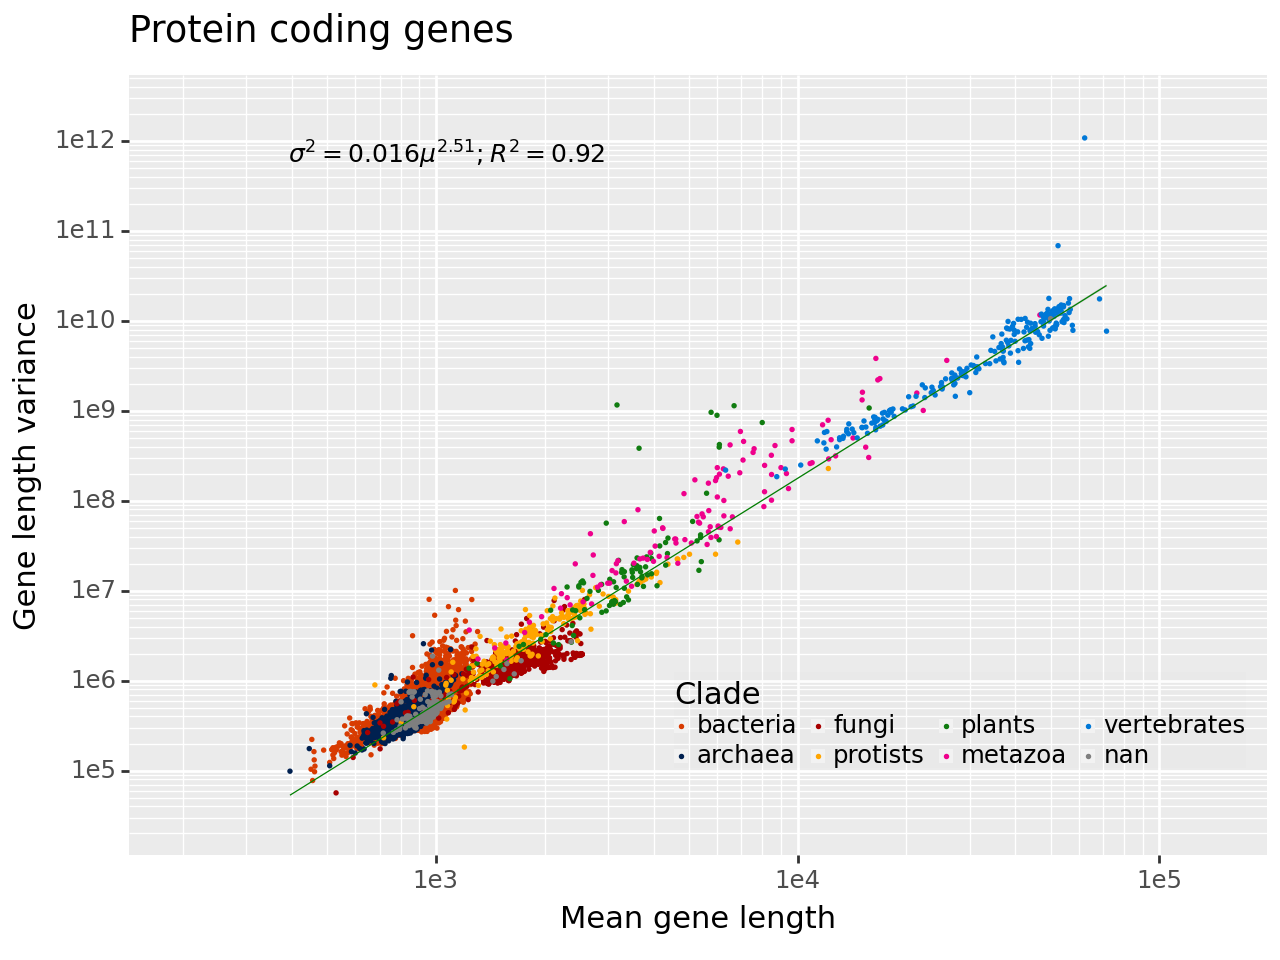

In [6]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df.copy()
if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

### Protein coding genes (33,459)
excluyendo 168 entradas del conjunto total de 33,627. Son entradas de division_7 que se pierden al hacer el label division_8.

(33459, 8)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
metazoa          115
plants            96
Name: count, dtype: int64


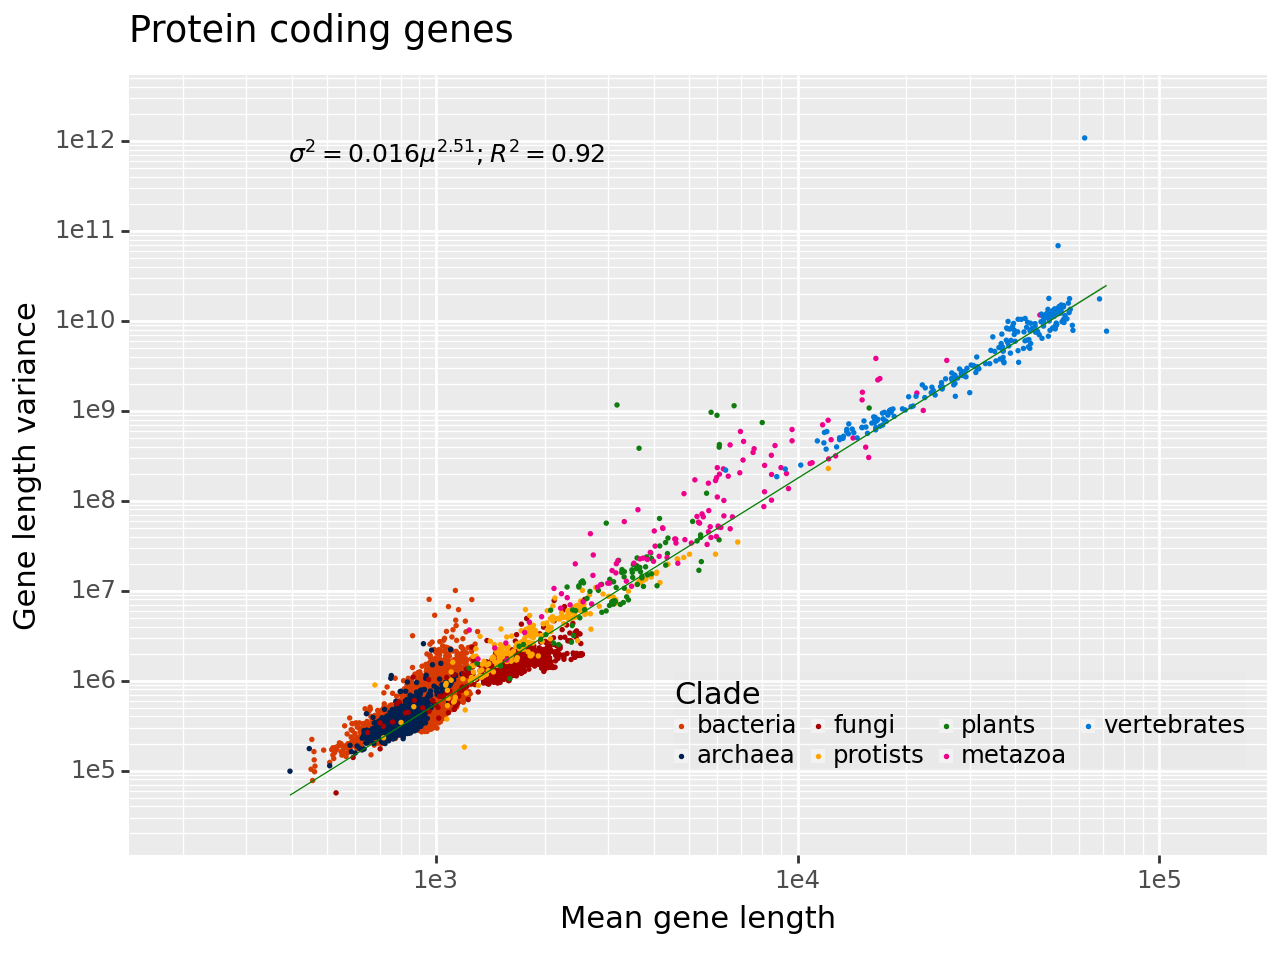

In [7]:
df2plot = stat_df.copy()
df2plot = filter_nan_in_division8(df2plot)
if 0:
    df2plot = filter_species_mus_caroli(df2plot) # puedo filtrar tb. mus. caroli, si quiero, como sugería Fer en el paper

if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

## Filtro por calidad de Genomas: usando NCBI genome annotations

#### Get good genomes
Genome status: Complete Genome or Chromosomes (from NCBI genome annotation)

In [8]:
from pathlib import Path
home = str(Path.home())
print(home)

/home/emuro


In [9]:
# Prokarya genomes: get those with a good genome annotation ("Status")
#
ncbi_genome_home = home + "/Desktop/goingOn/geneLength/NCBI_genomeReports/"
col1 = "TaxID"
col2 = "Assembly Accession"

good_status = ["Complete Genome", "Chromosome"] #["Complete Genome", "Chromosome", "Scaffold", "Contig"]

# Get well annotated eukarya genomes
g_prok_df = pd.read_csv(ncbi_genome_home + "prokaryotes_EMcolFiltered.txt", low_memory=False, sep="\t") # tax_id, status, accession 
g_euk_df  = pd.read_csv(ncbi_genome_home + "eukaryotes_EMcolFiltered.txt", sep="\t")                    
print("prokaryotes", g_prok_df.shape) # display(g_prok_df)
print("eukaryotes",  g_euk_df.shape)

# Ya filtra la calidad!
if 1: # 0: no filtra por calidad
    g_prok_df = g_prok_df[ g_prok_df["Status"].isin(good_status)]
    g_euk_df  = g_euk_df[  g_euk_df["Status"].isin(good_status)]
print("prokaryotes", g_prok_df.shape)
print("eukaryotes", g_euk_df.shape)

prokaryotes (405092, 6)
eukaryotes (22897, 6)
prokaryotes (34348, 6)
eukaryotes (3437, 6)


### From NCBI Assemblies files 
- dict: GC\% of Assembly_accession of species
- dict: size (Mbp) of Assembly_accession
- dict: replicons of Assembly_accession
- dict: status of Assembly_accession

In [10]:
print("Only high quality genomes!")

#
# Eukaryotes
if 0:
    print(g_euk_df.columns)
dict_euk_taxidOfAssembly     = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["TaxID"]))          # print(dict_euk_taxidOfAssembly)
dict_euk_gcOfAssembly        = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["GC%"]))            
dict_euk_sizeOfAssembly      = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Size (Mb)"]))      
dict_euk_repliconsOfAssembly = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Replicons"]))     
dict_euk_statusOfAssembly    = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Status"]))         
if 1:
  print(len(dict_euk_statusOfAssembly), "Eukaryotes")

# Prokaryotes
if 0:
    print(g_prok_df.columns)
dict_taxidOfAssembly     = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["TaxID"]))            # print(dict_taxidOfAssembly)
dict_gcOfAssembly        = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["GC%"]))            
dict_sizeOfAssembly      = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Size (Mb)"]))       
dict_repliconsOfAssembly = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Replicons"]))     
dict_statusOfAssembly    = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Status"]))        
if 1:
  print(len(dict_sizeOfAssembly), "Prokaryotes")

# Final dictionaries for Eukaryotes and Prokaryotes
dict_taxidOfAssembly.update(    dict_euk_taxidOfAssembly)
dict_gcOfAssembly.update(       dict_euk_gcOfAssembly)
dict_sizeOfAssembly.update(     dict_euk_sizeOfAssembly)
dict_repliconsOfAssembly.update(dict_euk_repliconsOfAssembly)
dict_statusOfAssembly.update(   dict_euk_statusOfAssembly)
if 1:
  print(len(dict_sizeOfAssembly), "Eukaryotes & Prokaryotes")

Only high quality genomes!
3437 Eukaryotes
34348 Prokaryotes
37785 Eukaryotes & Prokaryotes


#### Taxid/assemblies for high quality genome assemblies

In [11]:
taxid_highqu_genome_l = list(dict_taxidOfAssembly.values())
assembly_highqu_genome_l = list(dict_taxidOfAssembly.keys())

### From Ensembl Tax_id file 
dict: Assembly_accession of species (species is a perfect id in this case)

In [12]:
# ENSEMBL assembly accession
# system
import os
system = list(os.uname())[0]
if system == 'Linux':
    base_dir = "/media/emuro/Nubya/"
elif system == 'Darwin':
    base_dir = "/Volumes/Nubya/"
ensembl_Id_file = base_dir + "results/geneLength/outputInputFiles/" + "some_tables/species_Ensembl_taxid/" + "species_Ensembl_EMv2.0.tsv" # with covid
print(ensembl_Id_file)

# retrieve data
id_df = pd.read_csv(ensembl_Id_file, sep="\t")
id_df = id_df[["species", "assembly_accession"]]

dict_assemblyOfSpecies = dict(zip(id_df["species"], id_df["assembly_accession"])) # print(len(dict_assemblyOfSpecies))
# visualize data
if 0:
    print(dict_assemblyOfspecies)
pd.set_option('display.max_columns', None)
if 0:
    display(id_df.head(2))
    print(id_df.shape)

# Add the assembly of the species
stat_df["ensembl_assembly"] = stat_df["species"].map(dict_assemblyOfSpecies)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)       

/media/emuro/Nubya/results/geneLength/outputInputFiles/some_tables/species_Ensembl_taxid/species_Ensembl_EMv2.0.tsv


,division_8,species,taxonomy_id,trunk_genes_path,genes_file,count,mean,var,ensembl_assembly
0,archaea,methanobacterium_bryantii_gca_002287175,2161,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699,GCA_002287175.1
1,archaea,methanobacterium_formicicum_gca_000762265,2162,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747,GCA_000762265.1


(33627, 9)


#### Taxid and assembly accesssion with high quality genome

In [13]:
# taxid with high quality genome assemblies
taxid_highqu_genome_l    = list(dict_taxidOfAssembly.values()) # taxids
assembly_highqu_genome_l = list(dict_taxidOfAssembly.keys())   # assemblies

stat_df = stat_df[stat_df["taxonomy_id"].isin(taxid_highqu_genome_l)] # reduce to hquality taxonomies...
print(stat_df.shape) # much more redundancy in taxid than assembly, the assembly commands
#
stat_df = stat_df[stat_df["ensembl_assembly"].isin( assembly_highqu_genome_l )]
print(stat_df.shape)

(16264, 9)
(5771, 9)


#### For each filtered species add: genome size, gc content, chromosomes,... 

In [14]:
# Add the assembly of the species
stat_df["ensembl_assembly"] = stat_df["species"].map(dict_assemblyOfSpecies)
# Add more genomic info
stat_df["gc_percent"]      = stat_df["ensembl_assembly"].map(dict_gcOfAssembly)
stat_df["size_Mbp"]        = stat_df["ensembl_assembly"].map(dict_sizeOfAssembly)
stat_df["assembly_status"] = stat_df["ensembl_assembly"].map(dict_statusOfAssembly)
stat_df["chromosomes"]     = stat_df["ensembl_assembly"].map(dict_repliconsOfAssembly)

display(stat_df.head(2))
print(stat_df.shape)
print(stat_df['division_8'].value_counts(dropna=False))

,division_8,species,taxonomy_id,trunk_genes_path,genes_file,count,mean,var,ensembl_assembly,gc_percent,size_Mbp,assembly_status,chromosomes
1,archaea,methanobacterium_formicicum_gca_000762265,2162,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747,GCA_000762265.1,41.3,2.44999,Complete Genome,chromosome:NZ_CP006933.1/CP006933.1
2,archaea,methanobacterium_formicicum_gca_000953115,2162,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2409,860.747198,376618.539470,GCA_000953115.1,41.2,2.47807,Complete Genome,chromosome 1:LN515531.1


(5771, 13)
division_8
bacteria       5108
archaea         314
fungi           190
vertebrates      61
plants           47
protists         36
metazoa          15
Name: count, dtype: int64


#### Plot the taylor

(5771, 13)
division_8
bacteria       5108
archaea         314
fungi           190
vertebrates      61
plants           47
protists         36
metazoa          15
Name: count, dtype: int64


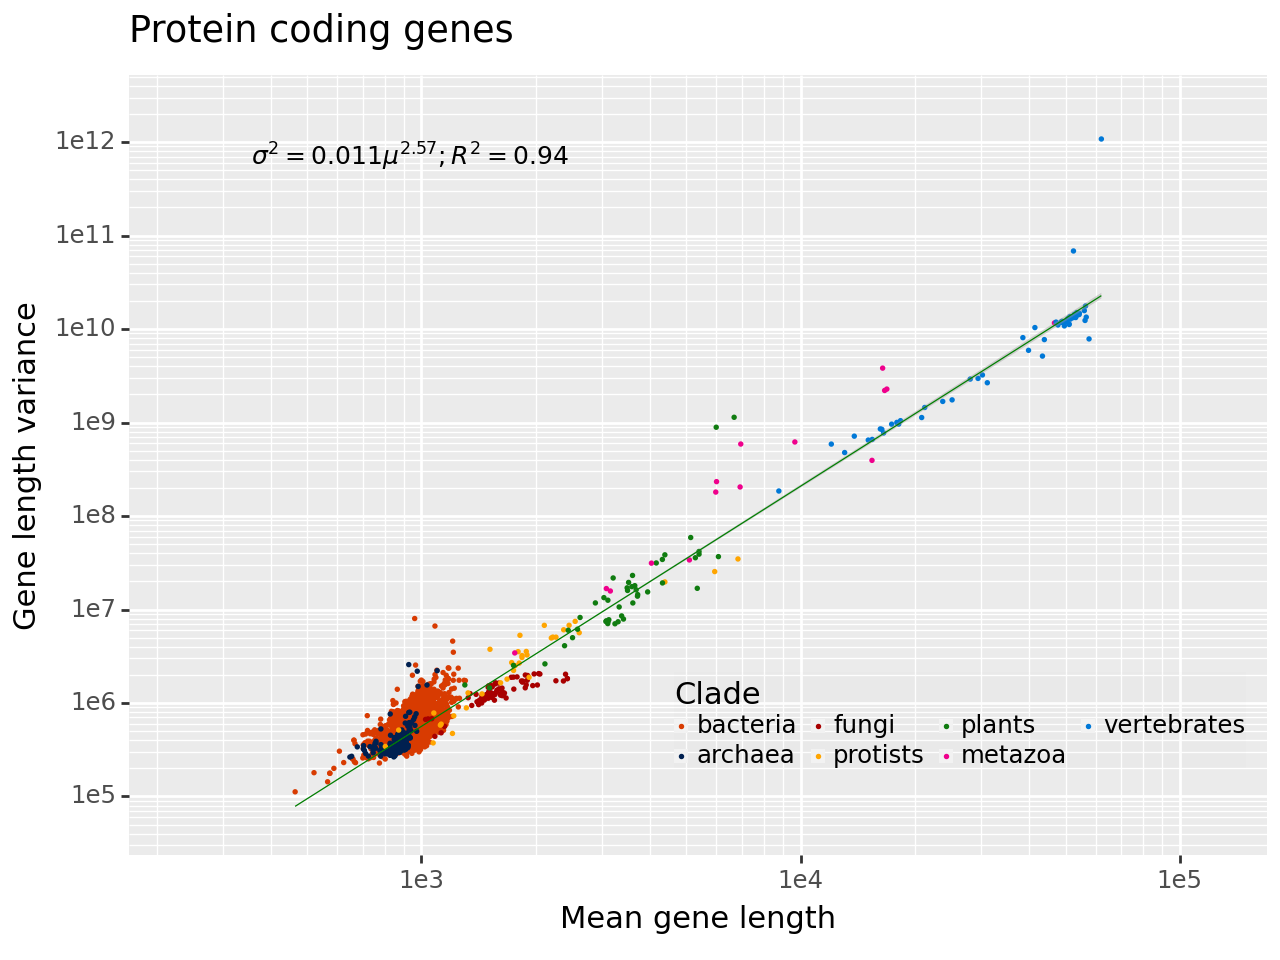

In [15]:
df2plot2 = stat_df.copy()
#in order not to show bacteria and archaea
#df2plot2 = df2plot2[df2plot2.division != 'bacteria']
#df2plot2 = df2plot2[df2plot2.division != 'archaea']

if 1:
    print(df2plot2.shape)
    print(df2plot2['division_8'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot2.merged_division_superregnum.unique())
df2plot2.division_8 = pd.Categorical(df2plot2.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot2.sort_values('division_8', inplace=True)

# Prepare to plot
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True
plot_taylor(df2plot2, col_x, col_y, x_lab, y_lab, title, bool_show_regression)